# CIS 4020
# Assignment 1 - [Ananya Thukral] - [1027782]
## Part 1 [20 Marks]

[6 Marks] 
# a

Write a simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights. Demonstrate the success of your approach on the sample data loaded below, and visualize the best fit plotted as a line (consider using linspace) against a scatter plot of the x and y test values.


In [637]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


    

In [638]:
import numpy as np
import random
from matplotlib import pyplot as plt

X = diabetes_X_train
y = diabetes_y_train

# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta


def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 10)
m, n = np.shape(x)
numIterations= 100000
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)


Iteration 0 | Cost: 412.722885
Iteration 1 | Cost: 235.901741
Iteration 2 | Cost: 162.978397
Iteration 3 | Cost: 132.894419
Iteration 4 | Cost: 120.474065
Iteration 5 | Cost: 115.336817
Iteration 6 | Cost: 113.202559
Iteration 7 | Cost: 112.306505
Iteration 8 | Cost: 111.920993
Iteration 9 | Cost: 111.745994
Iteration 10 | Cost: 111.657797
Iteration 11 | Cost: 111.605395
Iteration 12 | Cost: 111.567757
Iteration 13 | Cost: 111.536209
Iteration 14 | Cost: 111.507177
Iteration 15 | Cost: 111.479187
Iteration 16 | Cost: 111.451629
Iteration 17 | Cost: 111.424255
Iteration 18 | Cost: 111.396960
Iteration 19 | Cost: 111.369702
Iteration 20 | Cost: 111.342463
Iteration 21 | Cost: 111.315236
Iteration 22 | Cost: 111.288018
Iteration 23 | Cost: 111.260808
Iteration 24 | Cost: 111.233605
Iteration 25 | Cost: 111.206409
Iteration 26 | Cost: 111.179220
Iteration 27 | Cost: 111.152038
Iteration 28 | Cost: 111.124863
Iteration 29 | Cost: 111.097695
Iteration 30 | Cost: 111.070534
Iteration 31 | Cos

[2 Marks]
# b

Load data on movie ratings, revenue, metadata etc. Split data into a relevant set for training, testing and classification. Explain your choice of split. It is ok if you decide to split into these subsets after part c -> if you do so, mention this at the end of your explanation.

Explanation: 

- My part b,c,d are all together.
- All the code below has comments and explanations.
- Please, note that if you encounter any errors it might be because either you're running the cells in incorrect order or your anaconda doesn't have required packages installed.
- First cell below starts with data loading, cleaning and picking independent variables
- Starting from next call I have performed done Data Exploratory Analysis to understand what type of data I am dealing with and if it consists of any interesting patters, trends and most importantly how the columns/varaibles of data are correlated with each other. 



In [1]:
### An example to load a csv file
import pandas as pd 
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read
ratings_small=pd.read_csv('ratings_small.csv')
import warnings; warnings.simplefilter('ignore')

##### YOUR CODE HERE #######

#load other files
keywords = pd.read_csv('keywords.csv', low_memory=False)
# credits = pd.read_csv('credits.csv', low_memory=False)

#change, clean and remove
meta_data['id'] = pd.to_numeric(meta_data['id'],errors='coerce',downcast='integer')
meta_data['budget'] = pd.to_numeric(meta_data['budget'],errors='coerce',downcast='integer')
meta_data[['id', 'budget']] = meta_data[['id','budget']].fillna(value=0)
meta_data = meta_data.astype({'id': 'Int64', 'budget': 'Int64'})
meta_data.drop(meta_data[meta_data['budget']<=10000].index,inplace = True)
meta_data.drop(meta_data[meta_data['revenue']<=1000].index,inplace = True)
meta_data['runtime'].replace('', np.nan, inplace=True)
meta_data.dropna(subset=['runtime'], inplace=True)

#Left Merge/Join the data using id
# dataset = meta_data.merge(ratings_small,left_on='id',right_on='movieId',how='left')
dataset = meta_data.merge(keywords,left_on='id',right_on='id',how='left')
# dataset = dataset.merge(credits,left_on='id',right_on='id',how='left')

#more data cleaning
dataset['genres'] = dataset['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else[])
dataset['spoken_languages'] = dataset['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else[])
dataset['production_companies'] = dataset['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else[])    
dataset['keywords'] = dataset['keywords'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else[])
dataset['year'] = pd.to_datetime(dataset['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
dataset['month'] = pd.to_datetime(dataset['release_date'], errors='coerce').apply(lambda x: str(x.month) if x != np.nan else np.nan)
dataset['day'] = pd.to_datetime(dataset['release_date'], errors='coerce').apply(lambda x: str(x.day) if x != np.nan else np.nan)

X = dataset.iloc[:, :].values
y_revenue = dataset.iloc[:, 15].values

#picking independent variables (feature set - mostly numeric - easy to train/test data)
X = X[:,[2,16,23,25,26,27]]

# Removing zero REVENUES from the data - revenue is super important
# I could (and have) adjusted for inflation, but it made scant difference to model performance
y_revenue_removed = []
X_removed = []
for l in range(0,len(y_revenue)):
    if y_revenue[l] !=0:
        y_revenue_removed.append(y_revenue[l])
        X_removed.append(X[l])
y_revenue = np.array(y_revenue_removed)
X = np.array(X_removed)

dataset.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False                                                NaN  16000000   
3  False                                                NaN  60000000   
4  False                                                NaN  35000000   

                             genres                              homepage  \
0       [Animation, Comedy, Family]  http://toystory.disney.com/toy-story   
1      [Adventure, Fantasy, Family]                                   NaN   
2          [Comedy, Drama, Romance]                                   NaN   
3  [Action, Crime, Drama, Thriller]                                   NaN   
4     [Action, Adventure, Thriller]                                   NaN   

      id    imdb_id original_language     original_title  \
0    862  tt0114709                en          Toy Story   
1   8844  tt0113497                en            Jumanji   
2  31357  tt0114885                en  Waiting to Exhale   
3    949  tt0113277                en               Heat   
4   9091  tt0114576                en       Sudden Death   

                                            overview  ...    status  \
0  Led by Woody, Andy's toys live happily in his ...  ...  Released   
1  When siblings Judy and Peter discover an encha...  ...  Released   
2  Cheated on, mistreated and stepped on, the wom...  ...  Released   
3  Obsessive master thief, Neil McCauley leads a ...  ...  Released   
4  International action superstar Jean Claude Van...  ...  Released   

                                             tagline              title  \
0                                                NaN          Toy Story   
1          Roll the dice and unleash the excitement!            Jumanji   
2  Friends are the people who let you be yourself...  Waiting to Exhale   
3                           A Los Angeles Crime Saga               Heat   
4                         Terror goes into overtime.       Sudden Death   

   video vote_average  vote_count  \
0  False          7.7      5415.0   
1  False          6.9      2413.0   
2  False          6.1        34.0   
3  False          7.7      1886.0   
4  False          5.5       174.0   

                                            keywords  year month day  
0  [jealousy, toy, boy, friendship, friends, riva...  1995    10  30  
1  [board game, disappearance, based on children'...  1995    12  15  
2  [based on novel, interracial relationship, sin...  1995    12  22  
3  [robbery, detective, bank, obsession, chase, s...  1995    12  15  
4    [terrorist, hostage, explosive, vice president]  1995    12  22  

[5 rows x 28 columns]

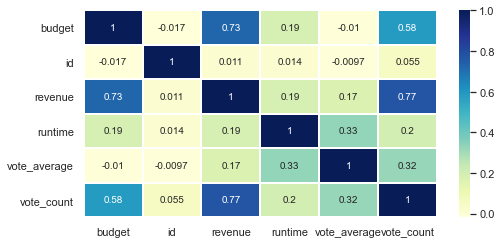

In [640]:
#Relation of Revenue with other attributes/columns
import seaborn as sns
sns.heatmap(dataset.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

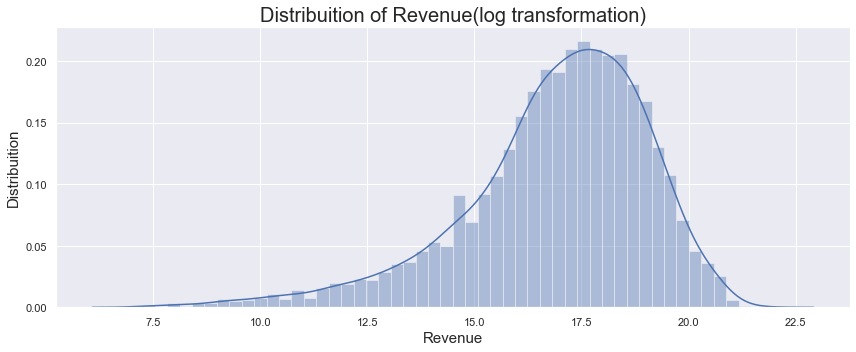

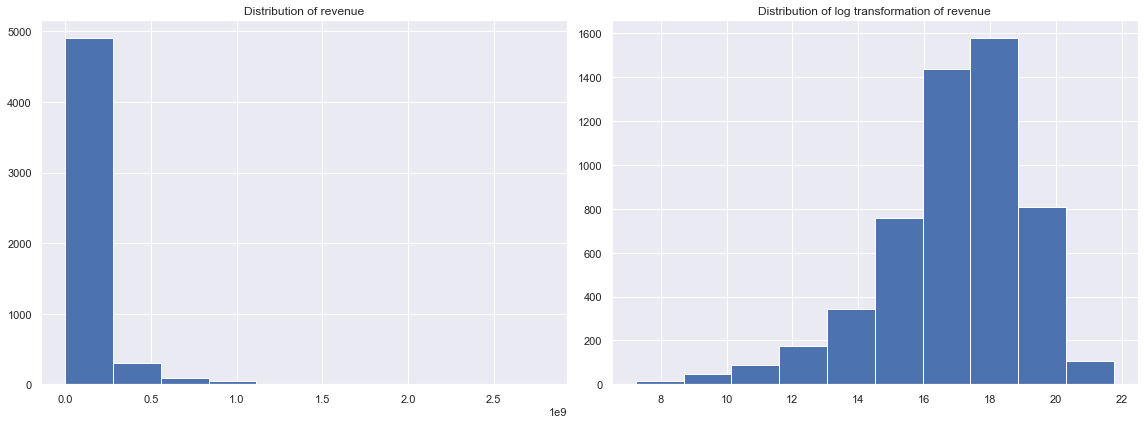

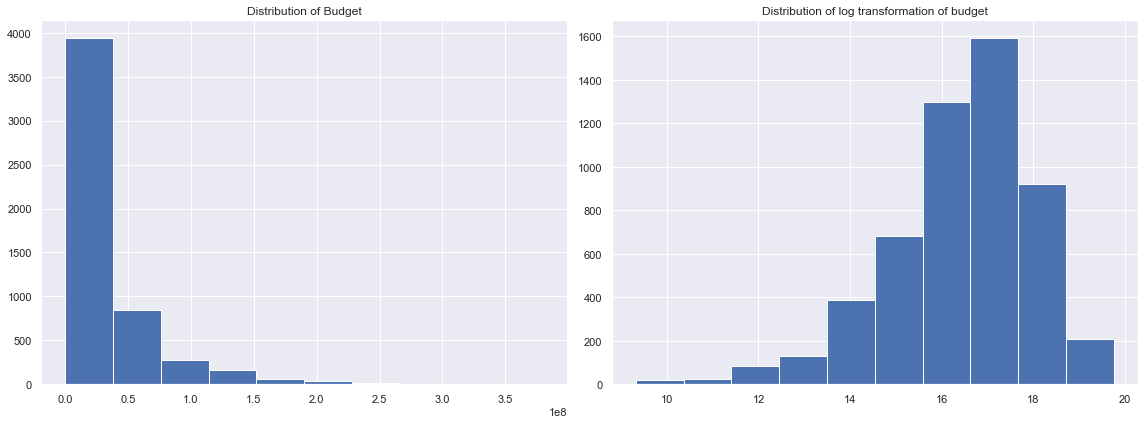

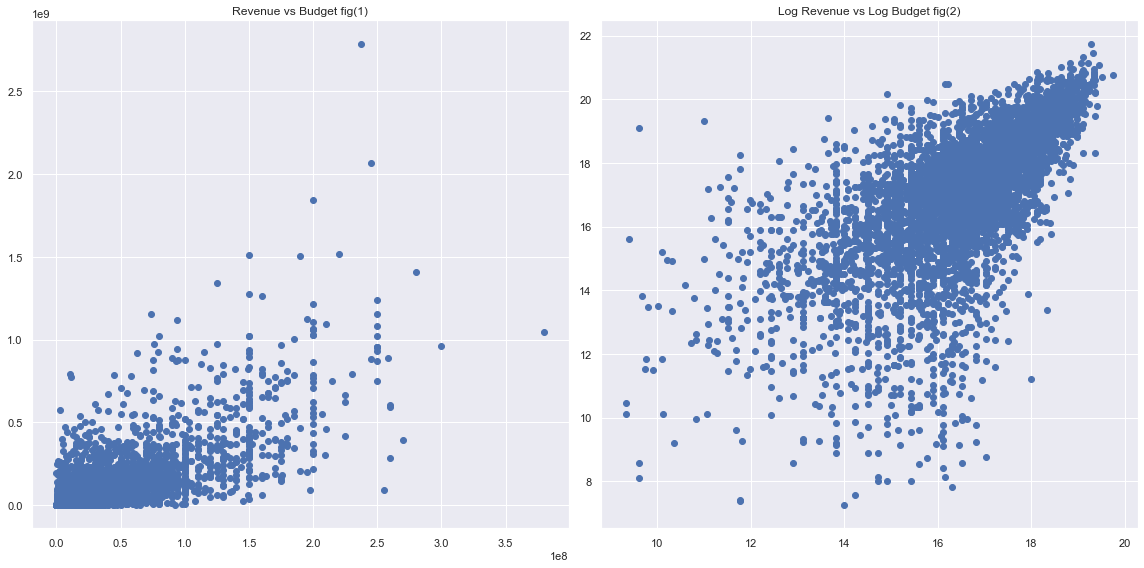

In [641]:
#creating log transformation for reveune
dataset['log_revenue'] = np.log1p(dataset['revenue']) #we are not using log0 to avoid & and null value as there might be 0 value

plt.figure(figsize=(12,5))

# seting the distribuition of our data and normalizing using np.log on values highest than 0 and + 
# also, we will set the number of bins and if we want or not kde on our histogram
ax = sns.distplot(dataset['log_revenue'])
ax.set_xlabel('Revenue', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue(log transformation)", fontsize=20) #seting the title and size of font

#comapring distribution of reveune and log revune side by side with histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1) #1 means 1 plot, 2 means column and 1 mean 1 sub plot
plt.hist(dataset['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)#1 means 1 plot, 2 means column and 2 mean second sub plot
plt.hist(dataset['log_revenue']);
plt.title('Distribution of log transformation of revenue');

#Relationship between Revenue and Budget
dataset['log_budget'] = np.log1p(dataset['budget'])

fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(dataset['budget']);
plt.title('Distribution of Budget');
plt.subplot(1, 2, 2)
plt.hist(dataset['log_budget']);
plt.title('Distribution of log transformation of budget');

#let's create scatter plot (Revenue and Budget)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(dataset['budget'], dataset['revenue'])
plt.title('Revenue vs Budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(dataset['log_budget'], dataset['log_revenue'])
plt.title('Log Revenue vs Log Budget fig(2)');


Note: professor said that we are allowed to either sketch the scatter plot for revenue vs rating or reveneue vs vote_count. Therefore, please consider the below picture (revenue vs vote_count).

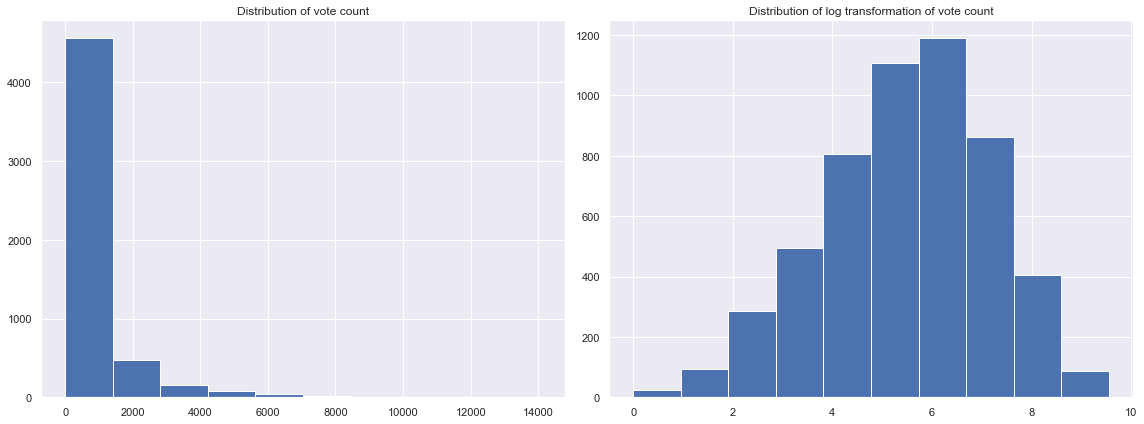

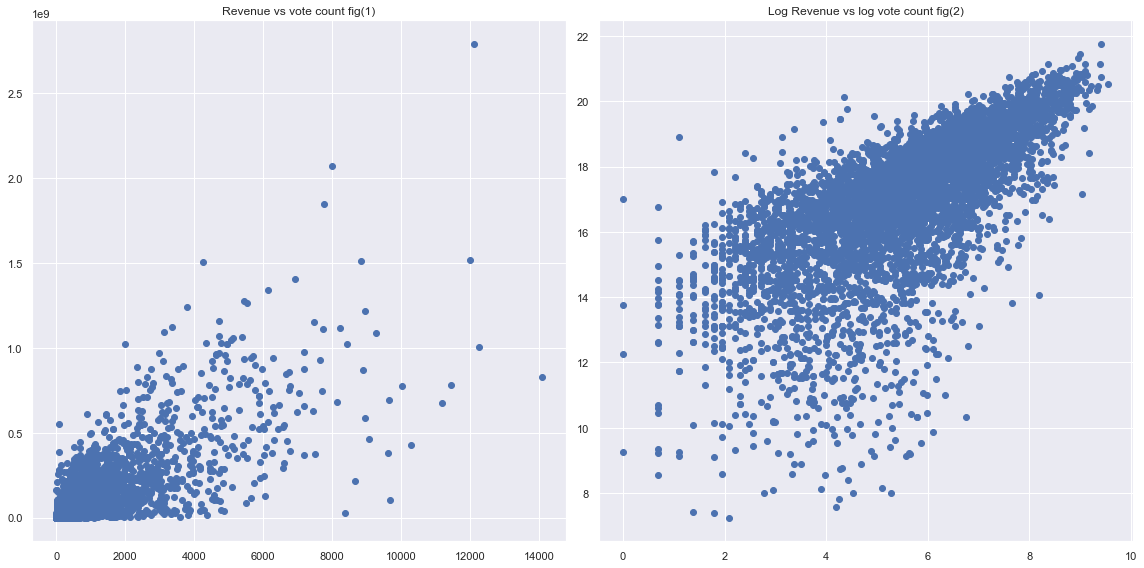

In [642]:
#log transformation of vote count
dataset['log_vote_count'] = np.log1p(dataset['vote_count'])

fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(dataset['vote_count']);
plt.title('Distribution of vote count');
plt.subplot(1, 2, 2)
plt.hist(dataset['log_vote_count']);
plt.title('Distribution of log transformation of vote count');

#let's create scatter plot (Revenue and Vote count)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(dataset['vote_count'], dataset['revenue'])
plt.title('Revenue vs vote count fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(dataset['log_vote_count'], dataset['log_revenue'])
plt.title('Log Revenue vs log vote count fig(2)');


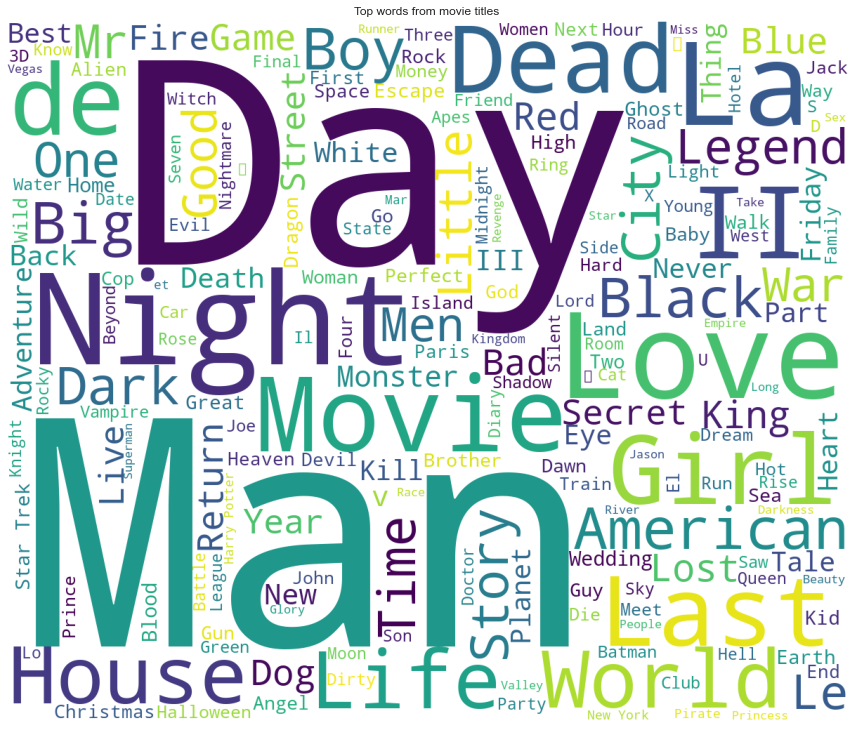

 Time taken to complete this operation is 6.968463659286499 seconds


In [643]:
#let's find top words from movie Titles
from wordcloud import WordCloud
import time
start = time.time()
plt.figure(figsize = (12, 12))
token_title = ' '.join(dataset['original_title'].values) #create split to title by sprace to extract the text.
#bg color set to white for good contrast, by default bg color is darker
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(token_title)
plt.imshow(wordcloud)
plt.title('Top words from movie titles ')
plt.axis("off") # we dont need axes for this
plt.show()
print(" Time taken to complete this operation is", time.time() - start, 'seconds')

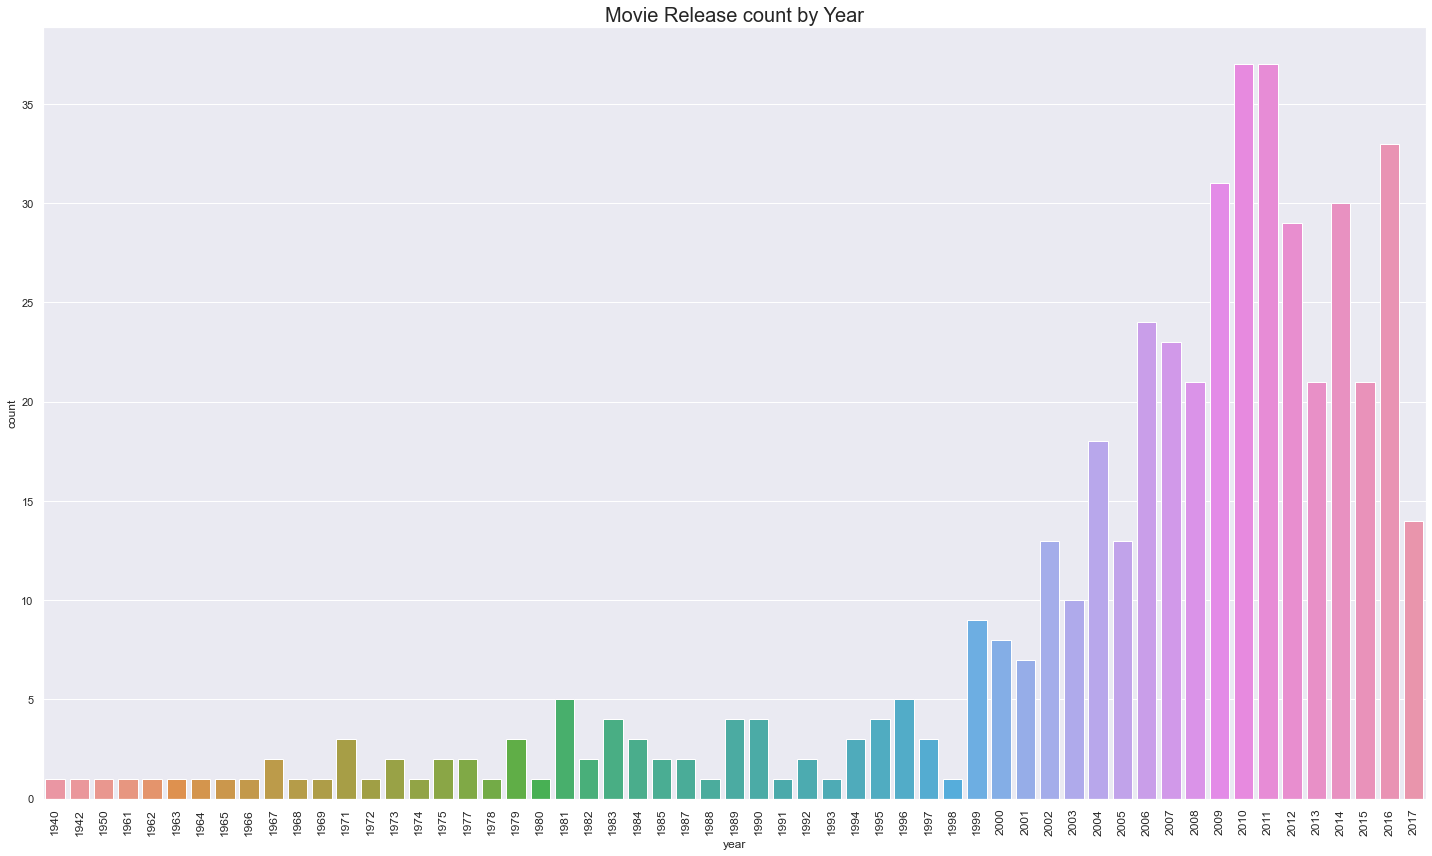

In [644]:
# Relationship between Release Date and Revenue
from matplotlib import pyplot as plt 
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

dataset = dataset.dropna() 

# Count no.of films released per year and sort the years in ascending order
# Do this for both Train and Test Sets
d1 = dataset['year'].value_counts().sort_index()

# x values are years, and y values are movie counts, name=legend
data = go.Scatter(x=d1.index, y=d1.values, name='movies data')

layout = go.Layout(title = "Number of films per year", xaxis_title = 'Release date in Year',yaxis_title = 'Movie Count')
py.iplot(dict(data=data, layout=layout))

#countplot chart for movies release year
plt.figure(figsize=(20,12))
sns.countplot(dataset['year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()


<Figure size 1440x360 with 0 Axes>

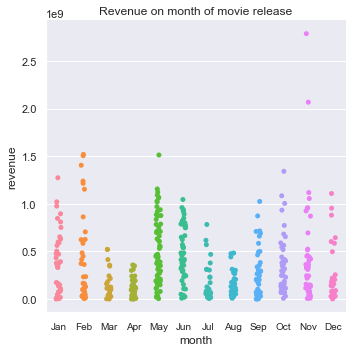

In [645]:
#Revenue and Month of Movie Release
plt.figure(figsize=(20,5));

sns.catplot(x='month', y='revenue', data=dataset);
plt.title('Revenue on month of movie release');
#lets replace number by actual month name
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=10)
plt.show()

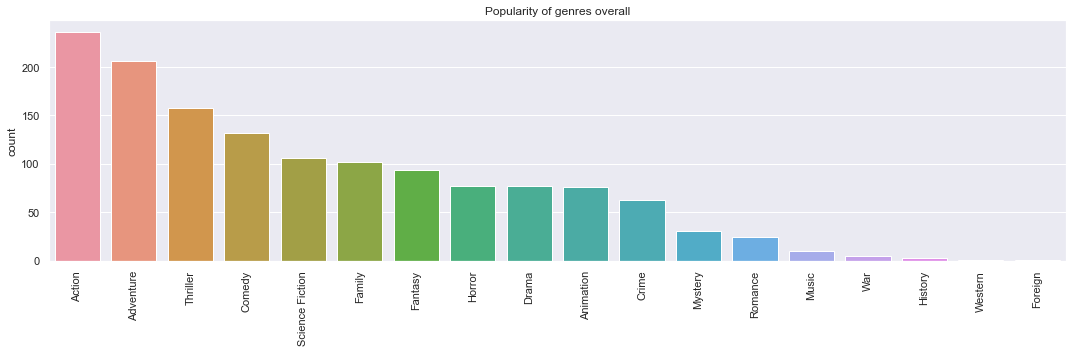

In [646]:
# Revenue and Genres
# Note: if you run this after last cell it won't work because you'll be deleting the genres from the main dataset. In that 
# case, you can go and run the first cell again :).

dataset = dataset.dropna() 
unique_genres = dataset["genres"].explode().unique() 
genres_dummies = pd.get_dummies(dataset["genres"].apply(pd.Series).stack()).sum(level=0) #one hot encoding
train_genres = pd.concat([dataset, genres_dummies],axis=1, sort=False)
genres_overall = train_genres[unique_genres].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=genres_overall.index, y=genres_overall.values)
plt.xticks(rotation=90)
plt.title("Popularity of genres overall")
plt.ylabel("count")
plt.show()

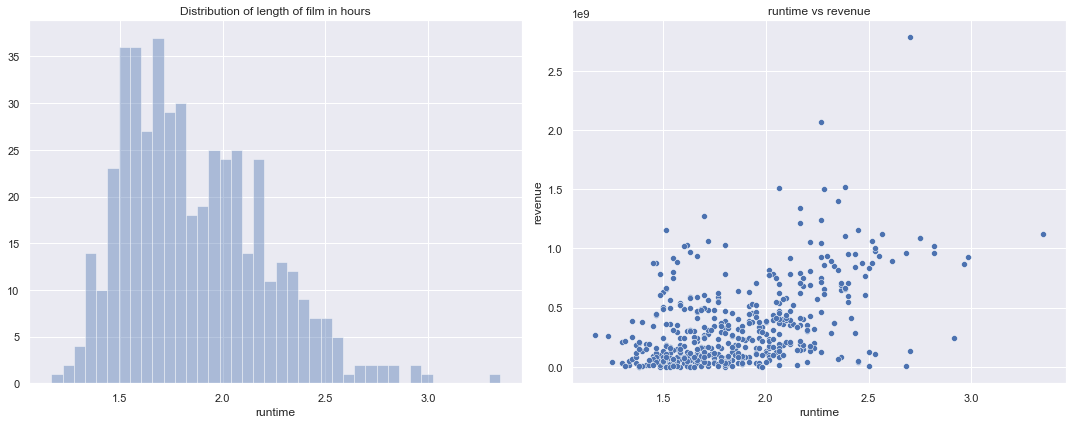

In [647]:
#Note: Run cells in proper order. Thank you :)
#Revenue vs Runtime

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(dataset['runtime'].fillna(0) / 60, bins=40, kde=False); #filling runtime with 0 if there were any missing values
plt.title('Distribution of length of film in hours');
plt.subplot(1, 2, 2)
sns.scatterplot(dataset['runtime'].fillna(0)/60, dataset['revenue'])
plt.title('runtime vs revenue');

In [648]:
#Conver the cleaned data into dataframe and save them to csv

dataset = dataset.apply(pd.to_numeric, errors='coerce')
dataset.fillna(0, inplace=True)

#rename the columns in the dataset for feature variables/set
dataset =  pd.DataFrame(data = X,  columns = ['budget','runtime', 'vote_count','year','month','day'])

#saving to CSVs as a checkpoint to be used in regressors
dataset.to_csv(r'Clean_Data.csv')
dataset_y_revenue = pd.DataFrame(y_revenue, columns = ['revenue'])
dataset_y_revenue.to_csv(r'Encoded_y - revenue.csv')

dataset.head()

budget runtime vote_count  year month day
0  30000000    81.0     5415.0  1995    10  30
1  65000000   104.0     2413.0  1995    12  15
2  16000000   127.0       34.0  1995    12  22
3  60000000   170.0     1886.0  1995    12  15
4  35000000   106.0      174.0  1995    12  22

[5 Marks]
# c

Organize the data into relevant features for predicting revenue. <br>

i.  Explain your feature sets and organization. <br>

YOUR EXPLANATION HERE (feature sets - input variables)

Feature Set:

 - Performed the Data Exploratory Analysis - Plotted the correlation between revenue and other attributes in the movies data.
 - Correlation Plot - Four variables selected (Vote Count, Budget, Runtime and Release Date - split into Year, Month, Day). 
 - Firstly, they have the most significant relationship with revenue (check the correlation plot and above analysis). 
 - Revenue is correlated with vote count, budget, runtime with a value of 0.77, 0.73, 0.19 respectively.
 - Secondly, they are numeric values. Hence, it becomes a lot easier to train and test the data.
 
Data Cleaning Process:

  - Removed Revenue and Budget rows that had 0/nan value. Further, adjusted revenue for inflation. 
  - Dropped rows from the metadata that had nan's to make it more clean and accurate for prediction. That resulted in lot of rows being lost but is better than bad data. 
  - Considered Budget value >= 10,000 and Revenue >1000. This data is not good for analysis purposes and wouldn't help much in Revenue prediction.
  - Columns - "Genre", "keywords", "production company", "spoken languages" JSON data transformed to List for exploratory analysis.
  - "Release Date" - As month, year is categorial data and not continous data. Therefore, i created catplot to explore the data (check the plots above). Further, the "Release Date" was split into Year, month and Day for Analysis. As a result from the catplot - There seems to have some correlation but it may not have one to one casual effect.


ii. Plot movie revenue vs. rating as a scatter plot and discuss your findings. <br>

- Already plotted above. I chose to draw a scatter plot for revenue vs vote_count

iii. Visualize any other relationships you deem interesting and explain. <br>


- Revenue and Budget: One can build a very good prediction of a film’s revenue based purely on inputs known before the film goes public. This has real world consequences: for instance, a cinema could use this to predict how long they’d like to run a film for, ahead of time. The plot above reflects the trend that with more budget we see increased revenue. 

- Genres: Action is the most popular Genre, followed by Adventure and Thriller

- We can see that since 2000s there are more movies that has been released. Release Date: Years between 2011-2012 has the most movies released. 

- From the above chart we can see also see that movie released in November has maximum revenue where as movie released in April has less revenue compared to other months.

- Revenue and Run time - Here we have run time in hour on x-axis and freq of movie in on y axis and then we cas see that most of the movie are between 1-3 hr. Further, the movie that fall on this duration has highest revenue.




[3 Marks]
# d

Train a regression model to predict movie revenue. Plot predicted revenue vs. actual revenue on the test set. Quantify the error in your prediction. (You may use sklearn for this step)

Linea Regression, R Square:  0.7040065681598289
Training score:  0.6556223519921378
Linea Regression MSE: 44117202940952352.00


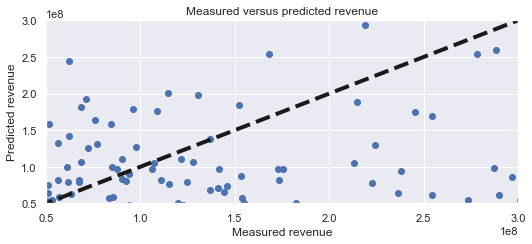

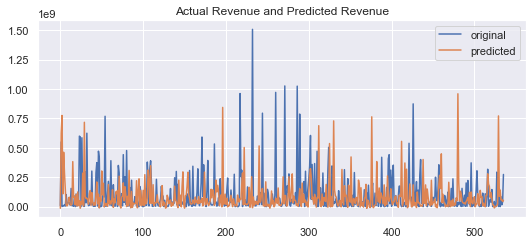

In [649]:
# Regression model here, plot your fit to the revenue data versus the actual data from the test set as a scatter plot.

##### YOUR CODE HERE #######
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
dataset_X_reimported = pd.read_csv('Clean_Data.csv') #clean data
dataset_y_reimported = pd.read_csv('Encoded_y - revenue.csv') #data is clean with no 0 revenue
dataset_reimported = pd.concat([dataset_X_reimported,dataset_y_reimported],axis=1)
dataset_reimported = dataset_reimported.replace([np.inf, -np.inf], np.nan)

X = dataset_reimported.iloc[:, 1:-2].values
y = dataset_reimported.iloc[:, -1].values

#Splitting the dataset into the Training set and Test set
#I have a fairly large dataset of +- 4000 entries, so I'm going with 10% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

#linear regression
lm = LinearRegression() #our 6th model
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)
print("Linea Regression, R Square: ", r2_score(y_test, lm_preds))

#training score
training_score = lm.score(X_train, y_train)
print("Training score: ", score)

#mean squared error
mse = mean_squared_error(y_test, y_pred) 
print("Linea Regression MSE: %.2f" % mse)

#Visualization 1
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured revenue')
ax.set_ylabel('Predicted revenue')
plt.title('Measured versus predicted revenue')
plt.ylim((50000000, 300000000))   # set the ylim to bottom, top
plt.xlim(50000000, 300000000)     # set the ylim to bottom, top
plt.show()

#Visualization 2
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Actual Revenue and Predicted Revenue")
plt.legend()
plt.show()

Training score:  0.6556223519921378
MSE: 3337356216292378.00
R square :  0.8829623013043087
     budget  year  month      revenue  predicted_revenue
0  30000000  1995     10  373554033.0       5.098507e+04
1  65000000  1995     12  262797249.0       4.005502e+08
2  16000000  1995     12   81452156.0      -5.582640e+06
3  60000000  1995     12  187436818.0       5.396143e+07
4  35000000  1995     12   64350171.0       1.059206e+07


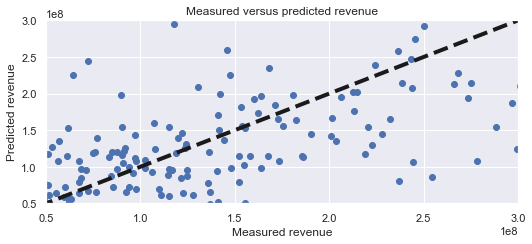

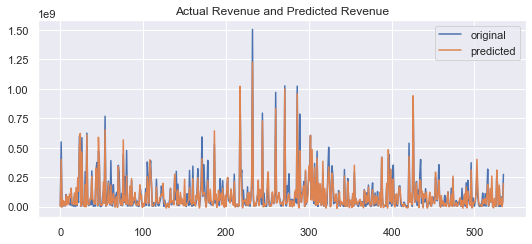

In [650]:
#XGBRegressor  
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import xgboost as xgb

regressor = XGBRegressor(colsample_bytree= 0.6, gamma= 0.7, max_depth= 4, min_child_weight= 5,
                         subsample = 0.8, objective='reg:squarederror')

predictions2 = regressor.fit(X, y)
y_pred = regressor.predict(X_test)

#training score
training_score = regressor.score(X_train, y_train)
print("Training score: ", score)

#mean squared error
mse = mean_squared_error(y_test, y_pred) 
print("MSE: %.2f" % mse)

#R2 score
score = r2_score(y_test, y_pred)
print("R square : ",score)

#Predictions for the test data
revenue_predictions = regressor.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions, columns = ['predicted_revenue'])
gbr_predictions.head()

test_result = pd.concat([dataset_reimported, gbr_predictions], axis = 1, sort=True)
test_result = test_result[[ 'budget','year','month', 'revenue','predicted_revenue']]
print(test_result.head())

#Visualization 1
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured revenue')
ax.set_ylabel('Predicted revenue')
plt.title('Measured versus predicted revenue')
plt.ylim((50000000, 300000000))   # set the ylim to bottom, top
plt.xlim(50000000, 300000000)     # set the ylim to bottom, top
plt.show()

#Visualization 2
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Actual Revenue and Predicted Revenue")
plt.legend()
plt.show()

[4 Marks]
# e

Try a non-linear fit to the data, with and without regularization. Find your best fit and justify the choice of parameters, regularization constant and norm. Plot predicted revenue vs. actual revenue on the test set. In each case, quantify the error. (See e.g. Generalized linear models, Kernel Ridge regression, SVR and others from sklearn)

Mean Squared Error:  6223868647759826.0
R square :  0.711522125415994


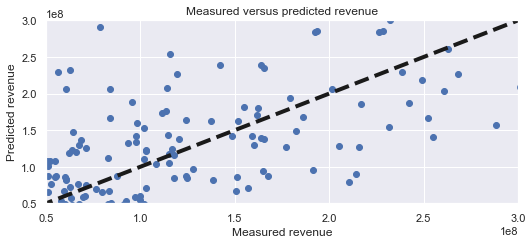

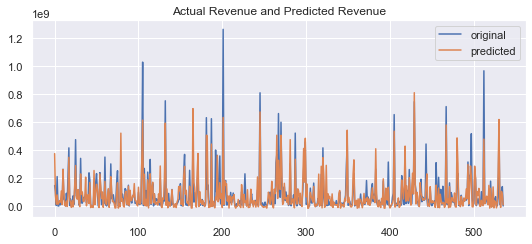

In [651]:
##### YOUR CODE HERE WITHOUT REGULARIZATION #######

from sklearn.kernel_ridge import KernelRidge
import numpy as np
import math

dataset_X_reimported = pd.read_csv('Clean_Data.csv') #clean data
dataset_y_reimported = pd.read_csv('Encoded_y - revenue.csv') #data is clean with no 0 revenue
dataset_reimported = pd.concat([dataset_X_reimported,dataset_y_reimported],axis=1)
dataset_reimported = dataset_reimported.replace([np.inf, -np.inf], np.nan)

X = dataset_reimported.iloc[:, 1:-2]
y = dataset_reimported.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

#without regularization, alpha = 0.0
krr = KernelRidge(alpha=0.0) #regularization parameter
krr.fit(X_train, y_train)
pred = krr.predict(X_test)

#Mean Square Error
MSE = mean_squared_error(y_test, pred)
print('Mean Squared Error: ', MSE)
      
#R2 score
score = r2_score(y_test, pred)
print("R square : ",score)

#Visualization 1 
fig, ax = plt.subplots()
ax.scatter(y_test, pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured revenue')
ax.set_ylabel('Predicted revenue')
plt.title('Measured versus predicted revenue')
plt.ylim((50000000, 300000000))   # set the ylim to bottom, top
plt.xlim(50000000, 300000000)     # set the ylim to bottom, top
plt.show()

# Subplot top-left
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.title("Actual Revenue and Predicted Revenue")
plt.legend()
plt.show()


For alpha 2.9, MSE error:  9425103947042618.0
For alpha 2.9 R square :  0.7157895828709162
     budget  year  month      revenue  predicted_revenue
0  30000000  1995     10  373554033.0       2.947054e+08
1  65000000  1995     12  262797249.0      -1.230947e+07
2  16000000  1995     12   81452156.0       2.397315e+07
3  60000000  1995     12  187436818.0       9.618668e+06
4  35000000  1995     12   64350171.0       3.706104e+08


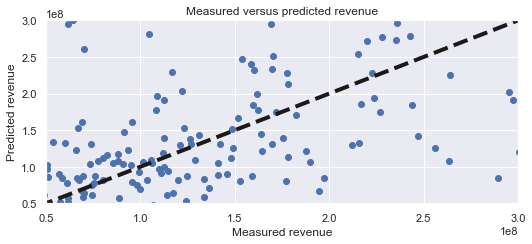

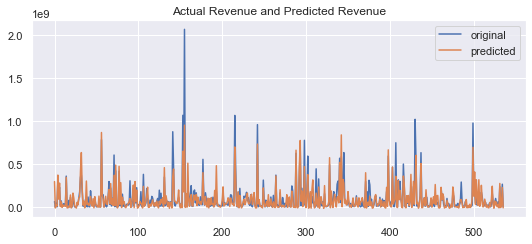

In [652]:
##### YOUR CODE HERE WITH REGULARIZATION #######

from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

dataset_X_reimported = pd.read_csv('Clean_Data.csv') #clean data
dataset_y_reimported = pd.read_csv('Encoded_y - revenue.csv') #data is clean with no 0 revenue
dataset_reimported = pd.concat([dataset_X_reimported,dataset_y_reimported],axis=1)
dataset_reimported = dataset_reimported.replace([np.inf, -np.inf], np.nan)

X = dataset_reimported.iloc[:, 1:-2]
y = dataset_reimported.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

#with regularization
krr = KernelRidge(alpha=2.9) #regularization parameter (for example alpha = 2.9)
krr.fit(X_train, y_train)
pred = krr.predict(X_test)
mse = mean_squared_error(y_test, pred)
print('For alpha 2.9, MSE error: ', mse)
#R2 score
score = r2_score(y_test, pred)
print("For alpha 2.9 R square : ",score)

#Predictions for the test data
revenue_predictions = krr.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions, columns = ['predicted_revenue'])
gbr_predictions.head()

test_result = pd.concat([dataset_reimported, gbr_predictions], axis = 1, sort=True)
test_result = test_result[[ 'budget','year','month', 'revenue','predicted_revenue']]
print(test_result.head())

#Visualization 1 
fig, ax = plt.subplots()
ax.scatter(y_test, pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured revenue')
ax.set_ylabel('Predicted revenue')
plt.title('Measured versus predicted revenue')
plt.ylim((50000000, 300000000))   # set the ylim to bottom, top
plt.xlim(50000000, 300000000)     # set the ylim to bottom, top
plt.show()

# Subplot top-left
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.title("Actual Revenue and Predicted Revenue")
plt.legend()
plt.show()


## Part 2 [10 Marks]

[4 Marks]
# a

Write a simple version of the basic algorithm for k-means clustering. Simple here means the core of the algorithm and not optimizations or extensions you might find in standard python libraries. Typically you might rely on a standard library for doing this, but it helps to see the core by manipulating the data and labels by hand as practice for numerical python and how to frame the algorithm.

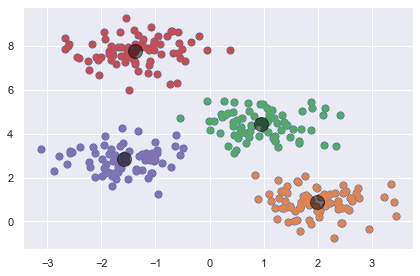

In [653]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import random


# Generate Samples
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

m=X.shape[0]
n=X.shape[1]
n_iter=50
K=4

#creating an empty centeroid array
centeroids = np.array([]).reshape(n,0)

#creating 4 random centeroids
for k in range(K):
    centeroids = np.c_[centeroids,X[random.randint(0,m-1)]]


#distance formula between points (Euclidean distance)
euclid = np.array([]).reshape(m,0)

#finding distance between each centeroid
for k in range(K):
    dist=np.sum((X-centeroids[:,k])**2,axis=1)
    euclid=np.c_[euclid,dist]
    
# storing the minimum value we have computed
minimum=np.argmin(euclid,axis=1)+1

# computing the mean of separated clusters
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)

# assigning of clusters to points
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]
for k in range(K):
    cent[k+1]=cent[k+1].T

# computing mean and updating it
for k in range(K):
     centeroids[:,k]=np.mean(cent[k+1],axis=0)
        
# repeating the above steps again and again
for i in range(n_iter):
    euclid=np.array([]).reshape(m,0)
    for k in range(K):
        dist=np.sum((X-centeroids[:,k])**2,axis=1)
        euclid=np.c_[euclid,dist]
    C=np.argmin(euclid,axis=1)+1
    cent={}
    for k in range(K):
        cent[k+1]=np.array([]).reshape(2,0)
    for k in range(m):
        cent[C[k]]=np.c_[cent[C[k]],X[k]]
    for k in range(K):
        cent[k+1]=cent[k+1].T
    for k in range(K):
        centeroids[:,k]=np.mean(cent[k+1],axis=0)
    final=cent
    

for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.scatter(centeroids[0,:],centeroids[1,:],s=200,c='black', alpha=0.5)
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()


<a id="data set"></a>
[6 Marks]
# b

Load the mystery data below, and cluster the data (you don't need to use your code from part a). Visualize the data including assigned cluster labels.

In [654]:
# Load the mystery data here and cluster using k-means (now you can use libraries e.g. sklearn)
mystery = np.load('mystery.npy')
mystery.shape


(30309, 784)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

X=np.load('mystery.npy')

wx = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wx.append(kmeans.inertia_)
plt.plot(range(1, 11), wx)
plt.xlabel('Number of clusters')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
import pandas as pd
pd.DataFrame(X).dtypes

In [ ]:
n = 5
kmeans=KMeans(n_clusters=n, random_state=20).fit(X)
labels_of_clusters = kmeans.fit_predict(X)
print(labels_of_clusters)

In [ ]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=30309, centers=5,
                       cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
cc=kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cc, s=10, cmap='viridis')

Clusters = Possibly between 5-7

YOUR EXPLANATION HERE

(any additional code supporting your assertion on the number of clusters may be included below)

In [ ]:
##### YOUR (OPTIONAL) CODE HERE #######

[2 Marks]
# Bonus

What is the mystery data in part 2? Show this in markdown and code below.

EXPLANATION HERE, code goes below.

In [ ]:
##### YOUR (OPTIONAL) CODE HERE #######

[10 Marks]
# Challenge question (required)

Describe how you might implement a solution to recommend new movies to a user based on their existing preferences or ratings from Part 1.

YOUR EXPLANATION HERE, provide an example for one user id below.

- I will go with Collabrative Filtering technique that can filter out items that a user might like on the basis of ratings by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

- The data taken for example smaller set can be considered in a form of a matrix consisting of the ratings given by a set of users to some movies from a set of movies. Each row would contain the ratings given by a user, and each column would contain the ratings received by a movie.  

- It is calculated only on the basis of the rating (explicit or implicit) a user gives to an item. For example, two users can be considered similar if they give the same ratings to ten movies despite there being a big difference in their age.

- There is quite a few libraries in Python that can build a recommender but the one i ended up choosing is "Surprise". Surprise is a Python SciKit that comes with various recommender algorithms and similarity metrics to make it easy to build and analyze recommenders. 

- The Dataset module is used to load data from files, Pandas dataframes, or even built-in datasets available for experimentation. (MovieLens 100k is one of the built-in datasets in Surprise.)

- Insallation done using: $ conda install -c conda-forge scikit-surprise

- In the first step, the data is stored in a dictionary that is loaded into a Pandas dataframe and then into a Dataset object from Surprise. 

- In the next step, I used an Algorithm based on K-Nearest (k-NN). It is available in Surprise as KNNWithMeans. The recommender function is configured to use the cosine similarity and to find similar items using the item-based approach. 

- To make this recommender, I created a Trainset from data. Trainset is built using the same data (coming from ratings.csv) but contains more information about the data, such as the number of users and movies (n_movies, n_users) that are used by the algorithm. We can create it either by using the entire data or a part of the data. We can also divide the data into folds where some of the data will be used for training and some for testing. 










In [ ]:
##### YOUR CODE HERE #######
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans


#load data
ratings_small=pd.read_csv('ratings_small.csv')
ratings_small.columns

df = pd.DataFrame(ratings_small)
reader = Reader(rating_scale=(1, 5))

# Loads Pandas dataframe
data = Dataset.load_from_df(df[["userId", "movieId", "rating"]], reader)

# Loads the builtin Movielens-100k data
movielens = Dataset.load_builtin('ml-100k')

# recommender Algorithm
# To use movie-based cosine similarity

sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between movies
}
algo = KNNWithMeans(sim_options=sim_options)


#Prediction - how a user with id = 1 may rate moviei d = 260
trainingSet = data.build_full_trainset()

algo.fit(trainingSet)

prediction = algo.predict('1', 260)

print("\n")
print("The user 1 (Userid), would rate 260 (MovieId) as: ", prediction.est)

